<a href="https://colab.research.google.com/github/mag381/AI/blob/main/04_PCA_TSNE_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import numpy as np
import pandas as pd
from pandas import plotting
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
# from sklearn import preprocessing
from sklearn import metrics
from sklearn import preprocessing, decomposition, manifold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
# アイリスデータを読み込み
iris = load_iris()
# 読み込んだデータの列 feature_names をdf0に格納
df0=pd.DataFrame(iris.data,columns=iris.feature_names)
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# df0に列 target を追加して、iris.targetの情報をコピー
df0["target"]=iris.target
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# df0 を df にコピー
df=df0
# 列 target の値(0,1,2)に応じて、
# 列 target_name に 花の名前を格納
df.loc[df["target"]==0, "target_name"] = "setosa"
df.loc[df["target"]==1, "target_name"] = "versicolor"
df.loc[df["target"]==2, "target_name"] = "virginica"
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


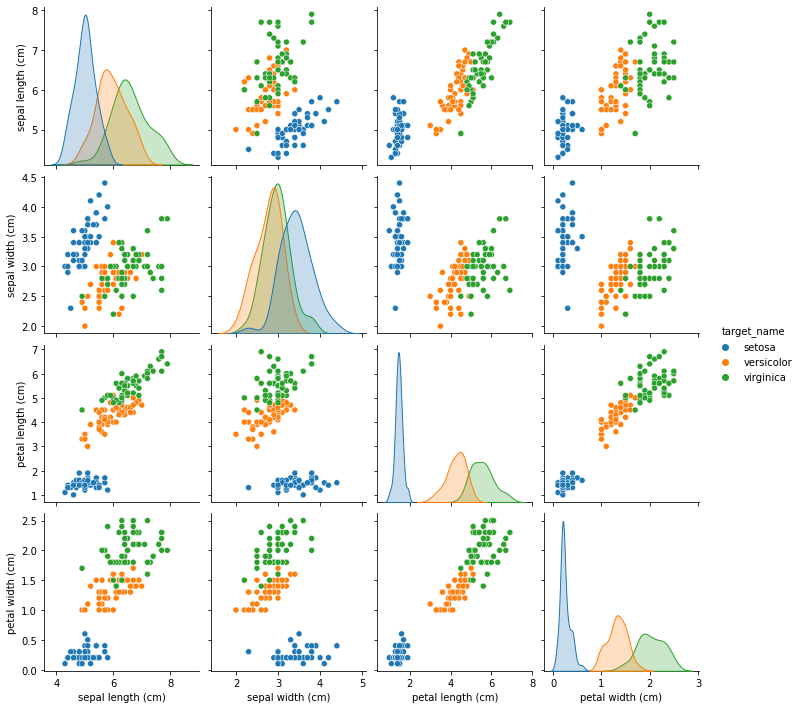

In [ ]:
# 列番号 0-3の4個を使って、ペアプロットを描く
# 列 target_name の値により、色を使い分ける
sns.pairplot(df,vars=df.columns[:4], hue="target_name")

In [ ]:
# 主成分分析(PCA: Principal Components Analysis)
pca=PCA(random_state=0)
# 以下の様に、主成分の数を指定できる
# pca = PCA(n_components=3)
# 指定しないと、データの次元数になる（今回はs=4)
  
# PCAの学習結果を x_pc に代入
x_pc=pca.fit_transform(df.iloc[:,0:4])
# 主成分の数の分のデータフレームを作って、
# 変数 df_pca に代入
df_pca=pd.DataFrame(x_pc,columns=["PC{}".format(i+1) for i in range(len(x_pc[0]))])
# df_pca に格納された主成分を表示
print("No. Principal components: ", pca.n_components_)
print("Held information: ",np.sum(pca.explained_variance_ratio_))
df_pca.head() 

No. Principal components:  4
Held information:  1.0


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

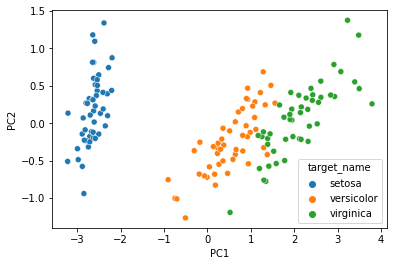

In [ ]:
# 第1主成分、第2主成分でクラスタリングできるか確認
sns.scatterplot(x="PC1",y="PC2",data=df_pca,hue=df["target_name"])

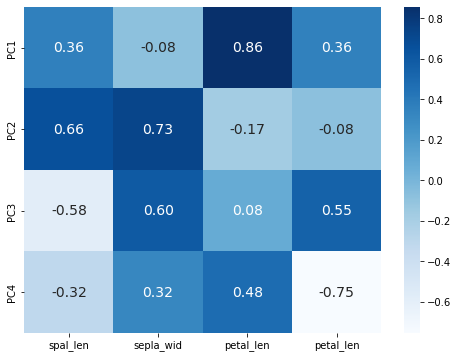

In [ ]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
sns.heatmap(pca.components_,
            cmap="Blues",
            annot=True,
            annot_kws={"size":14},
            fmt=".2f",
            xticklabels=["spal_len","sepla_wid","petal_len","petal_len"],
            yticklabels=["PC1","PC2","PC3","PC4"],ax=ax)
plt.show()

In [ ]:
# ワインのデータセットを利用する
df_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)
df_wine.columns=["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of as", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315","Proline"]
df_wine.shape
# 変数は14種類のデータが178セットあることを確認する
# 最初の class が正解（ワインの銘柄とリンクする数字）

(178, 14)

In [ ]:
df_wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of as,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<function matplotlib.pyplot.show(close=None, block=None)>

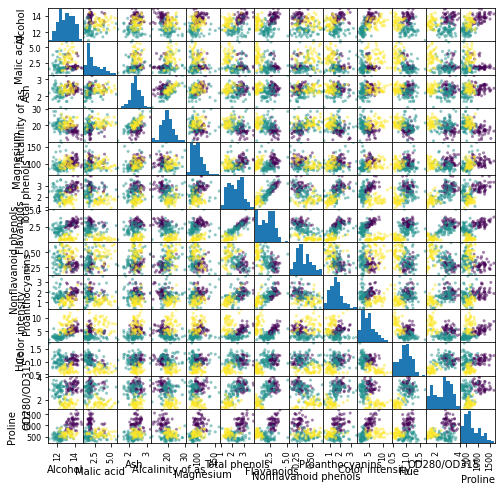

In [ ]:
# 変数同士の散布図を全変数分だけ描く
# class が正解なので、これを除いている
# [:,1:] は、全ての行、1番目の列(class)の右側の全ての列を指定している
# 列番号は0(class)から始まっているので、1というのは2番目の列(Alcohol)という意味
plotting.scatter_matrix(df_wine.iloc[:,1:],figsize=(8,8),c=list(df_wine.iloc[:,0]),alpha=0.5)
plt.show

In [ ]:
# 標準化処理
sca=preprocessing.StandardScaler()
# 説明変数は class 以外の13変数なので、それらを x に代入する
# [:,1:] は、全ての行、1番目の列(class)の右側の全ての列を指定している
# 列番号は0(class)から始まっているので、1というのは2番目の列(Alcohol)という意味
x=df_wine.iloc[:,1:]
print(x)

     Alcohol  Malic acid   Ash  Alcalinity of as  Magnesium  Total phenols  \
0      14.23        1.71  2.43              15.6        127           2.80   
1      13.20        1.78  2.14              11.2        100           2.65   
2      13.16        2.36  2.67              18.6        101           2.80   
3      14.37        1.95  2.50              16.8        113           3.85   
4      13.24        2.59  2.87              21.0        118           2.80   
..       ...         ...   ...               ...        ...            ...   
173    13.71        5.65  2.45              20.5         95           1.68   
174    13.40        3.91  2.48              23.0        102           1.80   
175    13.27        4.28  2.26              20.0        120           1.59   
176    13.17        2.59  2.37              20.0        120           1.65   
177    14.13        4.10  2.74              24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color i

In [ ]:
x_norm=sca.fit_transform(x)
# 主成分分析
# pca = PCA(n_components=3)のような指定はしないので
# データ次元と同じ13 (n_components=13) を指定していることになる
pca=PCA(random_state=0)
# PCA を時効
x_pc=pca.fit_transform(x_norm)
# 主成分の値を df_pca に代入
df_pca=pd.DataFrame(x_pc,columns=["PC{}".format(i+1) for i in range(len(x_pc[0]))])
# 主成分の数を表示
print("No. Principal components: ", pca.n_components_)
# df_pca に代入した主成分の値を表示
df_pca.head() 

No. Principal components:  13


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [ ]:
# 各主成分の分散の値を、小数点以下2桁で表示
pd.DataFrame(np.round(pca.explained_variance_,2),index=["PC{}".format(x+1) for x in range(len(df_pca.columns))], columns=["各主成分の分散"])

,各主成分の分散
PC1,4.73
PC2,2.51
PC3,1.45
PC4,0.92
PC5,0.86
PC6,0.65
PC7,0.55
PC8,0.35
PC9,0.29
PC10,0.25


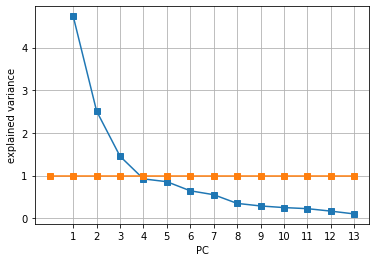

In [ ]:
# 主成分の分散を主成分の順番にプロット表示する
# これが、スクリープロット図
line=np.ones(14)
plt.plot(np.append(np.nan, pca.explained_variance_),"s-")
plt.plot(line,"s-")
plt.xlabel("PC")
plt.ylabel("explained variance")
plt.xticks(np.arange(1,14,1))
plt.grid()
plt.show()
# 分散が1以下になるまで主成分を考慮するなら4つ

In [ ]:
# 各主成分が持つ分散の比率を寄与率として表示
pd.DataFrame(np.round(pca.explained_variance_ratio_,2),index=["PC{}".format(x+1) for x in range(len(df_pca.columns))], columns=["寄与率"])

,寄与率
PC1,0.36
PC2,0.19
PC3,0.11
PC4,0.07
PC5,0.07
PC6,0.05
PC7,0.04
PC8,0.03
PC9,0.02
PC10,0.02


<function matplotlib.pyplot.show(close=None, block=None)>

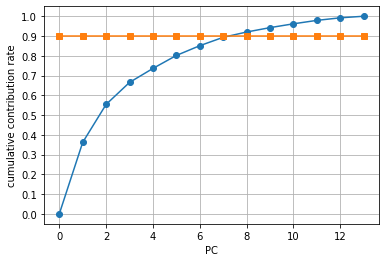

In [ ]:
# 各主成分が持つ分散の比率を寄与率の累積値を表示
line=np.full(14,0.9)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0]+list(np.cumsum(pca.explained_variance_ratio_)),"-o")
plt.xlabel("PC")
plt.ylabel("cumulative contribution rate")
plt.yticks(np.arange(0,1.1,0.1))
plt.plot(line,"s-")
plt.grid()
plt.show
# 累積値0.9以上必要なら主成分は8つ使う
# 累積値0.8以上必要なら主成分は5つまたは6つ使う

In [ ]:
# 標準化処理を定義
sca=preprocessing.StandardScaler()
# ワインの説明変数を変数 x に代入
x=df_wine.iloc[:,1:]
# 変数 x に標準化処理をして、x_norm に代入
x_norm=sca.fit_transform(x)
# n_componets= 整数なら次元数を意味するが、少数なら
# 累積寄与率がその数字になるように勝手に次元数を決めてくれる
pca=PCA(n_components=0.9,random_state=0)
# PCAを実行
x_pc=pca.fit_transform(x_norm)
# 主成分の値を df_pca に代入
df_pca=pd.DataFrame(x_pc,columns=["PC{}".format(i+1) for i in range(len(x_pc[0]))])
# 主成分の数を表示（今回は、整数を指定していないので
# どんな数になるかは表示しないとわからない）
print("No. Principal components: ", pca.n_components_)
# 主成分の数はやっぱり、8だった。
# 
print("累積寄与率：", round(np.sum(pca.explained_variance_ratio_),2))
# df_pca に代入した主成分の値を表示
df_pca.head() 

No. Principal components:  8
累積寄与率： 0.92


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700


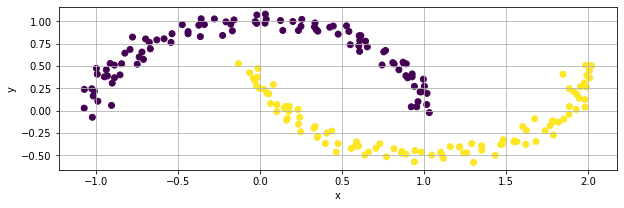

In [ ]:
# PCAが不得意な別のデータを使ってみる
# 人工的にデータ生成させる
x,y = datasets.make_moons(n_samples=200,noise=0.05,random_state=0)
# 生成したデータを散布図としてプロットする
plt.figure(figsize=(10,3))
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
# PCA で2つのクラスターに分類してみる
pca=PCA(n_components=2)
# PCA適用結果を x_re に代入 
x_re=pca.fit_transform(x)
# 実は2次元から2次元なので、何もしていないのと同じ

Text(0, 0.5, 'PCA-2')

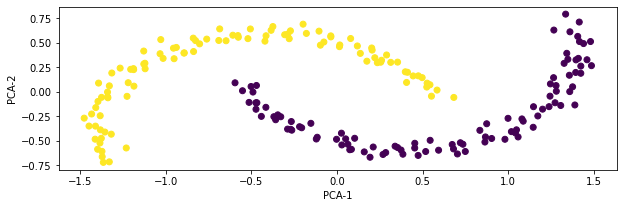

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(x_re[:,0], x_re[:,1], c=y)
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
# よく見ると、上図の上下・左右反転してるだけ

In [ ]:
# Spectral Embeddingを適用してみる
# 全部のデータ点と各データ点のつながりの情報を使い次元を削減
# 使う次元は2、考慮する近傍の点の数は10に設定
se = manifold.SpectralEmbedding(n_components=2,  affinity='nearest_neighbors')
x_se = se.fit_transform(x)

Text(0, 0.5, 'SE-2')

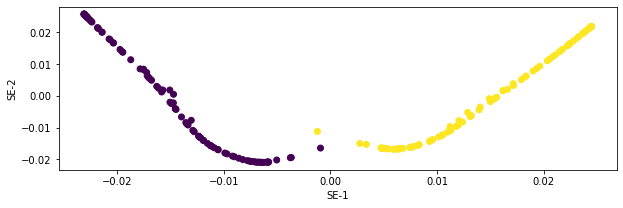

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(x_se[:,0],x_se[:,1], c=y)
plt.xlabel('SE-1')
plt.ylabel('SE-2')
# SE-1 の大小でかなり分離できる

In [ ]:
# Isomapを適用してみる
# 使う次元は2、考慮する近傍の点の数は10に設定
im10=manifold.Isomap(n_neighbors=10,n_components=2)
# 学習実行し、結果を x_im に代入
x_im=im10.fit_transform(x)

Text(0, 0.5, 'IM-2')

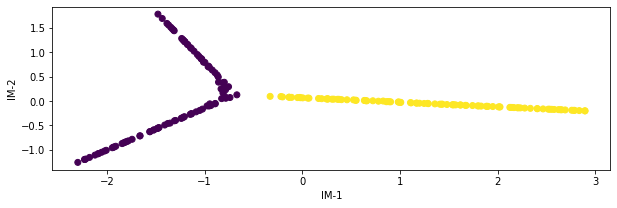

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(x_im[:,0],x_im[:,1], c=y)
plt.xlabel('IM-1')
plt.ylabel('IM-2')
# IM-1 の大小で完全に分離できる

In [ ]:
# 別のデータセットを使って次元削減を評価
# 手書き数字の画像（ピクセル毎の濃淡数値）
# データの読み込み（8x8=64ピクセル）

digits=load_digits()
print(digits.data.shape)
print(digits.data)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


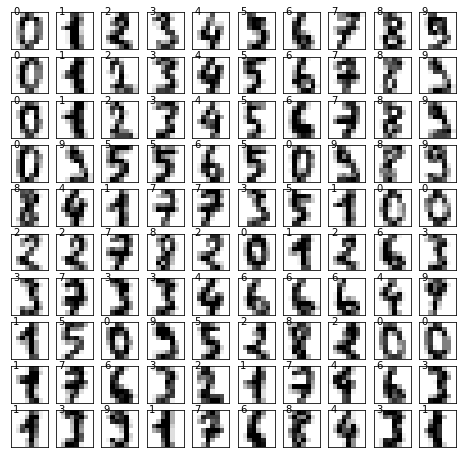

In [ ]:
fig, axes = plt.subplots(10,10,figsize=(8,8),subplot_kw={"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
  ax.text(0,0,str(digits.target[i]))


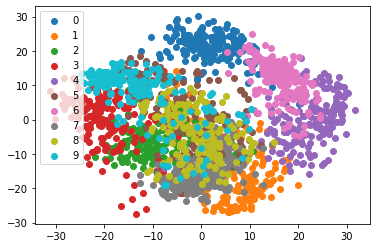

In [ ]:
# PCAで2次元に圧縮してみた
x_re=PCA(n_components=2).fit_transform(digits.data)
for each_label in digits.target_names:
  c_plot_bool=digits.target==each_label
  plt.scatter(x_re[c_plot_bool,0],x_re[c_plot_bool,1],label="{}".format(each_label))
  plt.legend()
plt.show()
# うまく分類できていない

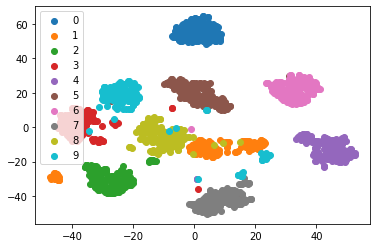

In [ ]:
# t-SNE を試してみる
# 近傍の点を考慮するパラメータ(perplexity)を指定して
# いないので、デフォルトの30が自動的に選ばれる

x_re=TSNE(n_components=2,random_state=0).fit_transform(digits.data)
for each_label in digits.target_names:
  bool=digits.target==each_label
  plt.scatter(x_re[bool,0],x_re[bool,1],label="{}".format(each_label))
  plt.legend()
plt.show()
# そこそこ分類できている

In [ ]:
# UMAP(Uniform Manifold Approxiamtion and Projection)
# 精度はt-SNEと℃程度、処理速度が速い、
# 近傍のデータをどれだけ考慮するかで、精度、速度が変わるため
# パラメータの最適化が必要
!pip3 install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=1ec30e17b6c1065b04868af1d96e06f5b7974a8768cfcefbdc5f02c312e6adb4
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=d6553571df9f184fc4a952c09df56bb93febd6851d85338c7bdd26244b0a0b77
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
import umap
start_time_tsne=time.time()
x_re=TSNE(n_components=2, random_state=0).fit_transform(digits.data)
i_tsne=time.time()-start_time_tsne
start_time_umap=time.time()
x_um =umap.UMAP(n_components=2,random_state=0).fit_transform(digits.data)
i_umap=time.time()-start_time_umap
print("tsne: {}".format(np.round(i_tsne,2)))
print("umap: {}".format(np.round(i_umap,2)))

tsne: 12.72
umap: 7.8


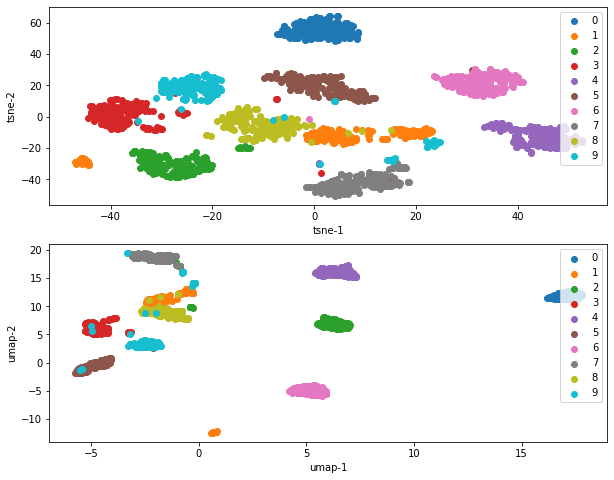

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
for each_label in digits.target_names:
  bool=digits.target == each_label
  plt.scatter(x_re[bool,0],x_re[bool,1],label="{}".format(each_label))
  plt.legend(loc="upper right")
  plt.xlabel("tsne-1")
  plt.ylabel("tsne-2")

plt.subplot(2,1,2)
for each_label in digits.target_names:
  bool=digits.target == each_label
  plt.scatter(x_um[bool,0],x_um[bool,1],label="{}".format(each_label))
  plt.legend(loc="upper right")
  plt.xlabel("umap-1")
  plt.ylabel("umap-2")


In [ ]:
# まとめて比較
# 高次元データの可視化を目的とした次元削減手法を紹介
# https://blog.brainpad.co.jp/entry/2022/03/09/160000

In [ ]:
digits = load_digits()
x, y = digits.data, digits.target

In [ ]:
import umap

In [ ]:
# PCA
pca = PCA(n_components=2, random_state=0)
x_re_pca = pca.fit_transform(x)
# t-SNE
tsne = TSNE(n_components=2, random_state=0)
x_re_tsne = tsne.fit_transform(x)
# UMAP
from scipy.sparse.csgraph import connected_components
umap = umap.UMAP(n_components=2, random_state=0)
x_re_umap = umap.fit_transform(x)

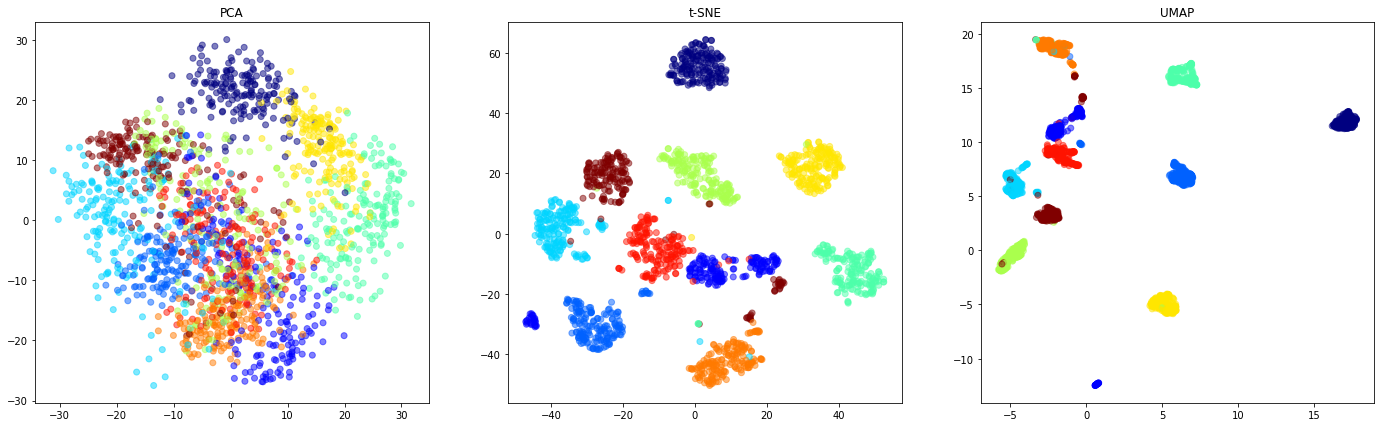

In [ ]:
# 可視化
Figure = plt.figure(figsize=(24, 7))
ax1 = Figure.add_subplot(1,3,1)
ax2 = Figure.add_subplot(1,3,2)
ax3 = Figure.add_subplot(1,3,3)

ax1.scatter(x_re_pca[:, 0], x_re_pca[:, 1],
            c=y, cmap='jet', alpha=0.5)
ax2.scatter(x_re_tsne[:, 0], x_re_tsne[:, 1],
            c=y, cmap='jet', alpha=0.5)
ax3.scatter(x_re_umap[:, 0], x_re_umap[:, 1],
            c=y, cmap='jet', alpha=0.5)

ax1.set_title("PCA")
ax2.set_title("t-SNE")
ax3.set_title("UMAP")

plt.show()